In [2]:
import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from librosa.feature import mfcc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import multivariate_normal
from scipy.special import logsumexp


# Reading CREMA dataset

In [10]:
crema = '/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/CREMA'
crema_dir = os.listdir(crema)
emotions = []
path_file = []
for audio in crema_dir :
    path_file.append(crema +'/'+ audio)
    parts = audio.split("_")
    if "ANG" in parts:
        emotions.append("Angry")
    elif "DIS" in parts:
        emotions.append("Disgust")
    elif "FEA" in parts:
        emotions.append("Fear")
    elif "HAP" in parts:
        emotions.append("Happy")
    elif "SAD" in parts:
        emotions.append("Sad")
    elif "NEU" in parts:
        emotions.append("Neutral")
# MAKE THIS INFORMATION INTO DATAFRAME
emotion_df = pd.DataFrame(emotions, columns=["Emotions"])
filePath_df = pd.DataFrame(path_file, columns=["Path"])

crema_df = pd.concat([emotion_df, filePath_df], axis=1)
crema_df.tail(10)

,Emotions,Path
7432,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7433,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7434,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7435,Happy,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7436,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7437,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7438,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7439,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7440,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7441,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


# Reading RAVDESS dataset

In [11]:
ravdess='/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/RAVDESS'
ravdess_dir = os.listdir(ravdess)

ravdees_dir =ravdess_dir[0]
emotions = []
path_file = []

for directory in ravdess_dir:
    try:
        actor = os.listdir(ravdess+"/"+directory)
        for audio in actor:
            file_info = audio.split("-")
            emotions.append(int(file_info[2]))
            path_file.append(ravdess+'/'+directory+"/"+audio)
    except:
        print('Passed')
## DATAFRAME
emotions_df = pd.DataFrame(emotions, columns=["Emotions"])
pathFile_df = pd.DataFrame(path_file, columns=["Path"])

ravdess_df = pd.concat([emotions_df, pathFile_df], axis=1)
ravdess_df['Emotions'] = ravdess_df['Emotions'].replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'})
ravdess_df.head()

Passed


,Emotions,Path
0,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


# Reading TESS dataset

In [12]:
tess='/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/TESS'
tess_dir = os.listdir(tess)
emotions = []
filepath = []

for dir in tess_dir:
    try:
        folder = os.listdir(tess+'/'+dir)
        for audio in folder:
            #print(audio)
            audio_description = audio.split(".")[0]
            file = audio_description.split("_")
            if 'ps' in file:
                emotions.append('Surprised')
            elif len(file)==2:
                emotions.append(file[1])

            else:
                emotions.append(file[2])
            filepath.append(tess+'/'+dir+"/"+audio)
    except:
        print('Skip')


emotions_df = pd.DataFrame(emotions, columns=["Emotions"])
pathFile_df = pd.DataFrame(filepath, columns=["Path"])

tess_df = pd.concat([emotions_df, pathFile_df], axis=1)
tess_df['Emotions'] = tess_df['Emotions'].replace({"neutral":'Neutral', "happy":'Happy', "sad":'Sad', "angry":'Angry', "fear":'Fear', 'disgust':'Disgust', 'surprised':'Surprised'})
tess_df['Emotions'] = tess_df['Emotions'].replace('surprise', 'Surprised')


tess_df

Skip


,Emotions,Path
0,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
...,...,...
2795,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2796,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2797,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2798,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


# For better evaluation join calmnad neutral emotions

In [13]:
df = pd.concat([crema_df,ravdess_df, tess_df],axis=0)
# df.to_csv("data_path.csv",index=False)
df['Emotions'] = df['Emotions'].replace('Surprise', 'Surprised')
df['Emotions'] = df['Emotions'].replace('Calm', 'Neutral')
len(df)

df

,Emotions,Path
0,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
...,...,...
2795,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2796,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2797,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2798,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


# Extracting MFCC features

In [14]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    X, sample_rate = librosa.load(file_name, sr=None) 

    result = np.array([])

    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    return result


def get_features(row):
    features = extract_feature(row['Path'], mfcc=True)
    return features

feature_data = []

for i, row in df.iterrows():
    features = get_features(row) 
    label = row['Emotions'] 
    feature_data.append([features, label])  

column_names = ['features', 'Emotions']

features_df = pd.DataFrame(feature_data, columns=column_names)
features_df.head()


,features,Emotions
0,"[-236.38174438476562, 83.46347045898438, 16.29...",Angry
1,"[-309.6947937011719, 98.22966003417969, 34.212...",Angry
2,"[-381.4065856933594, 103.9388656616211, 35.128...",Neutral
3,"[-374.8182373046875, 108.60301208496094, 42.59...",Neutral
4,"[-382.00946044921875, 109.52068328857422, 38.7...",Disgust


# Lib PCA & StandardScaler

In [15]:
table = np.array(features_df['features'].tolist())
pca = PCA(50)
pcaed_table = pca.fit_transform(table)

scaler = StandardScaler()
final_table = scaler.fit_transform(pcaed_table)

# Train data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(final_table,np.array(features_df['Emotions'].tolist()), test_size=0.2, train_size=0.8)

# Code of manual Gaussian Mixture Model

Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

       Angry       0.81      0.48      0.60       376
     Disgust       0.44      0.53      0.48       359
        Fear       0.56      0.42      0.48       350
       Happy       0.51      0.42      0.46       401
     Neutral       0.47      0.66      0.55       354
         Sad       0.52      0.65      0.57       382
   Surprised       0.89      0.87      0.88       115

    accuracy                           0.54      2337
   macro avg       0.60      0.58      0.58      2337
weighted avg       0.57      0.54      0.54      2337



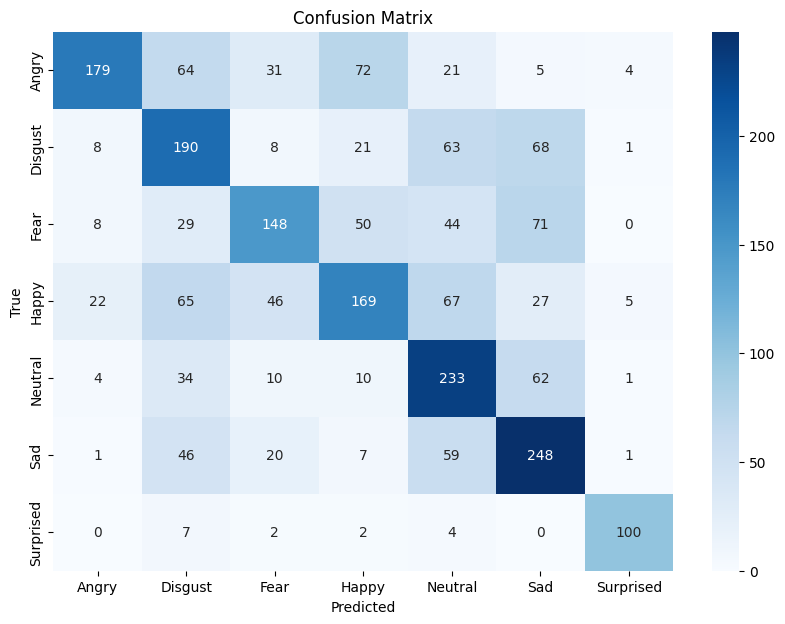

In [17]:
def initialize_gmm(X, n_components, reg_covar=1e-3):
    """Initialize GMM parameters without K-means"""
    n_samples, n_features = X.shape
    
    # Randomly select data points as initial means
    indices = np.random.choice(n_samples, n_components, replace=False)
    means = X[indices]
    
    # Initialize covariance matrices with global covariance + regularization
    global_cov = np.cov(X.T) #+ reg_covar * np.eye(n_features)
    covariances = np.tile(global_cov, (n_components, 1, 1))
    
    # Uniform weights
    weights = np.ones(n_components) / n_components
    
    return means, covariances, weights

def expectation_step(X, means, covariances, weights, reg_covar=1e-6):
    """E-step with full covariance matrices and log-domain stability"""
    n_samples, _ = X.shape
    n_components = len(weights)
    log_resp = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        # Add regularization to covariance
        cov = covariances[k] 
        try:
            log_prob = multivariate_normal.logpdf(X, means[k], cov)
        except np.linalg.LinAlgError:
            # Handle singular covariance
            log_prob = multivariate_normal.logpdf(X, means[k], cov)
        
        log_resp[:, k] = np.log(weights[k]) + log_prob
    
    # Normalize using logsumexp for numerical stability
    log_resp -= logsumexp(log_resp, axis=1, keepdims=True)
    return np.exp(log_resp)

def maximization_step(X, responsibilities, reg_covar=1e-6):
    """M-step with full covariance matrices"""
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]
    
    weights = responsibilities.mean(axis=0)
    means = np.zeros((n_components, n_features))
    covariances = np.zeros((n_components, n_features, n_features))
    
    for k in range(n_components):
        resp = responsibilities[:, k]
        sum_resp = resp.sum()
        
        # Update means
        means[k] = (X.T * resp).T.sum(axis=0) / sum_resp
        
        # Update covariances
        diff = X - means[k]
        cov = (diff.T * resp) @ diff / sum_resp
        cov += reg_covar * np.eye(n_features)  # Regularization
        covariances[k] = cov
    
    return means, covariances, weights

def train_gmm(X, n_components=2, max_iter=100, tol=1e-3, reg_covar=1e-3):
    """Full EM implementation without K-means"""
    # Initialize parameters
    means, covariances, weights = initialize_gmm(X, n_components, reg_covar)
    prev_lower_bound = -np.inf
    
    for _ in range(max_iter):
        # E-step
        resp = expectation_step(X, means, covariances, weights, reg_covar)
        
        # M-step
        means, covariances, weights = maximization_step(X, resp, reg_covar)
        
        # Compute log-likelihood for convergence check
        log_likelihood = 0
        for k in range(n_components):
            cov = covariances[k] 
            log_prob = multivariate_normal.logpdf(X, means[k], cov)
            log_likelihood += np.sum(weights[k] * np.exp(log_prob))
        log_likelihood = np.log(log_likelihood).sum()
        
        if np.abs(log_likelihood - prev_lower_bound) < tol:
            break
        prev_lower_bound = log_likelihood
    
    return {'weights': weights, 'means': means, 'covariances': covariances}

# --------------------------
# Emotion Recognition Pipeline
# --------------------------

def calculate_bic(X, gmm_params):
    n_params = (len(gmm_params['weights']) - 1) + \
               len(gmm_params['means'].flatten()) + \
               len(gmm_params['covariances'].flatten())
    return -2 * gmm_score_sample(X, gmm_params) + n_params * np.log(X.shape[0])

emotion_gmms = {}
for emotion in np.unique(y_train):
    emotion_mask = (y_train == emotion)
    X_emotion = X_train[emotion_mask]
    
    # Optimal components can be determined using BIC/AIC
    best_n = 3  # Replace with your component selection logic
    gmm_params = train_gmm(X_emotion, n_components=best_n, reg_covar=1e-3)
    emotion_gmms[emotion] = gmm_params

def gmm_score_sample(sample, gmm_params):
    """Calculate log-likelihood using full covariance"""
    log_probs = []
    for j in range(len(gmm_params['weights'])):
        cov = gmm_params['covariances'][j] + 1e-6 * np.eye(gmm_params['covariances'][j].shape[0])
        log_prob = np.log(gmm_params['weights'][j]) + \
                   multivariate_normal.logpdf(
                       sample, 
                       mean=gmm_params['means'][j],
                       cov=cov
                   )
        log_probs.append(log_prob)
    return logsumexp(log_probs)


y_pred = []
for sample in X_test:
    log_likelihoods = {emotion: gmm_score_sample(sample, params) 
                      for emotion, params in emotion_gmms.items()}
    y_pred.append(max(log_likelihoods, key=log_likelihoods.get))

y_test_labels = y_test
y_pred_labels = np.array(y_pred)

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.2f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

{'Angry': {'precision': 0.8063063063063063, 'recall': 0.47606382978723405, 'f1-score': 0.5986622073578596, 'support': 376.0}, 'Disgust': {'precision': 0.4367816091954023, 'recall': 0.5292479108635098, 'f1-score': 0.47858942065491183, 'support': 359.0}, 'Fear': {'precision': 0.5584905660377358, 'recall': 0.4228571428571429, 'f1-score': 0.4813008130081301, 'support': 350.0}, 'Happy': {'precision': 0.5105740181268882, 'recall': 0.42144638403990026, 'f1-score': 0.46174863387978143, 'support': 401.0}, 'Neutral': {'precision': 0.4745417515274949, 'recall': 0.6581920903954802, 'f1-score': 0.5514792899408284, 'support': 354.0}, 'Sad': {'precision': 0.5155925155925156, 'recall': 0.6492146596858639, 'f1-score': 0.574739281575898, 'support': 382.0}, 'Surprised': {'precision': 0.8928571428571429, 'recall': 0.8695652173913043, 'f1-score': 0.8810572687224669, 'support': 115.0}}


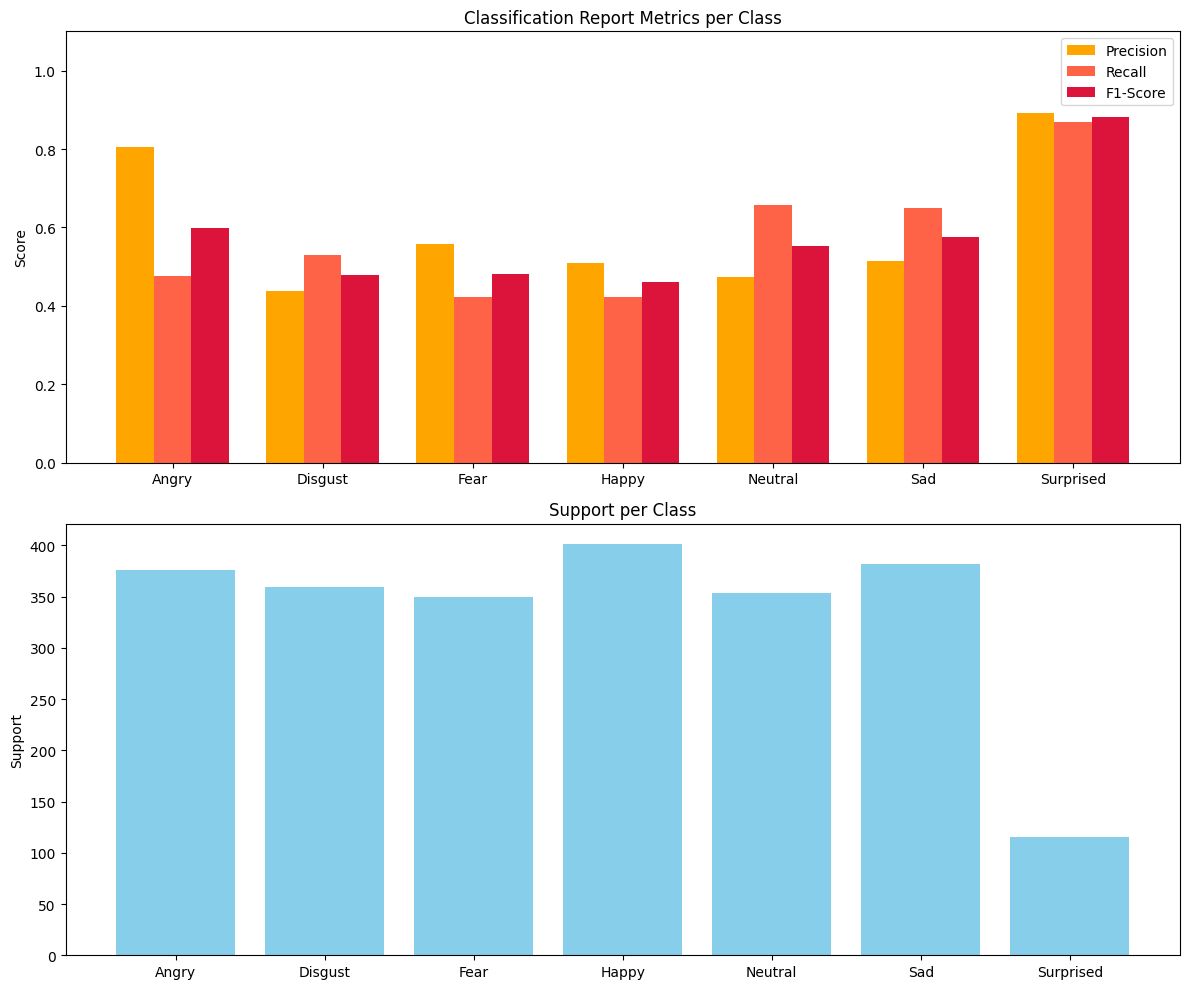

In [20]:
report_dict = classification_report(y_test_labels, y_pred_labels, output_dict=True)
report_dict = {'Angry': report_dict['Angry'], 'Disgust': report_dict['Disgust'], 'Fear': report_dict['Fear'], 'Happy': report_dict['Happy'], 'Neutral': report_dict['Neutral'], 'Sad': report_dict['Sad'], 'Neutral': report_dict['Neutral'], 'Surprised': report_dict['Surprised']}
print(report_dict)

class_labels = list(report_dict.keys())

precision = [report_dict[label]['precision'] for label in class_labels]
recall = [report_dict[label]['recall'] for label in class_labels]
f1_score = [report_dict[label]['f1-score'] for label in class_labels]
support = [report_dict[label]['support'] for label in class_labels]

x = np.arange(len(class_labels))
width = 0.25

fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs[0].bar(x - width, precision, width, label='Precision', color='orange')
axs[0].bar(x, recall, width, label='Recall', color='tomato')
axs[0].bar(x + width, f1_score, width, label='F1-Score', color='crimson')

axs[0].set_ylabel('Score')
axs[0].set_title('Classification Report Metrics per Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(class_labels)
axs[0].legend()
axs[0].set_ylim(0, 1.1)

axs[1].bar(class_labels, support, color='skyblue')
axs[1].set_ylabel('Support')
axs[1].set_title('Support per Class')

plt.tight_layout()
plt.show()